In [45]:
import pandas as pd

%matplotlib inline

In [46]:
data = pd.read_csv('./Downloads/titanic/train.csv') 

In [47]:
data.groupby(["Pclass"])["Survived"].value_counts(normalize=True)

#Гипотеза: выживаемость выше среди людей из высшего класса
#Вывод: согласно анализу, действительно, чем выше класс - тем больше процент выживших среди пассажиров этого класса

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

In [48]:
data.groupby(["Sex"])["Survived"].value_counts(normalize=True)

#Гипотеза: у мужчин ниже процент выживаемости, чем у женщин
#Вывод: гипотеза подтвердилась (возможно, потому что женщин спасали первее, а мужчины оставались помогать спасать дальше на корабле)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

Age_class     Survived
(0.0, 10.0]   1           0.593750
              0           0.406250
(10.0, 20.0]  0           0.617391
              1           0.382609
(20.0, 30.0]  0           0.634783
              1           0.365217
(30.0, 40.0]  0           0.554839
              1           0.445161
(40.0, 50.0]  0           0.616279
              1           0.383721
(50.0, 60.0]  0           0.595238
              1           0.404762
(60.0, 70.0]  0           0.764706
              1           0.235294
(70.0, 80.0]  0           0.800000
              1           0.200000
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Количество выживших в зависимости от возраста')

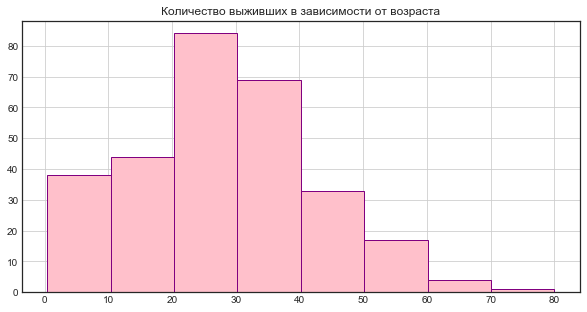

In [78]:
age_classes = [0, 10, 20, 30, 40, 50, 60, 70, 80]
data['Age_class'] = pd.cut(data['Age'].fillna(-1), bins=age_classes).astype(object)
print(data.groupby(data['Age_class'])['Survived'].value_counts(normalize=True))
data[data['Survived'] == 1]['Age'].hist(figsize=(10, 5), bins=8, edgecolor='purple', grid=True, color='pink').set_title("Количество выживших в зависимости от возраста")

#Гипотеза: Среди молодых людей больше процент выживаемости
#Вывод: Гипотеза в целом подтвержена - наибольший процент выживших среди детей до 10 лет (возможно, потому что их спасали в 
# первую очередь), второе место занимает возрастная группа 30-40 лет. Меньше всего процент выживших среди людей 60+. 
# Согласно количеству людей, отражённых на гистограмме - больше всего выживших среди людей среднего возраста.

In [58]:
data.groupby(["Sex", "Pclass", "Age_Class"])["Survived"].value_counts(normalize=True)

#Гипотеза: Обобщая результаты предыдущих гипотез - больше всего выживших среди молодых лиц женского пола из высшего класса
#Вывод: в целом гипотеза выполняется с небольшими отклонениями

Sex     Pclass  Age_Class     Survived
female  1       (0.0, 10.0]   0           1.000000
                (10.0, 20.0]  1           1.000000
                (20.0, 30.0]  1           0.952381
                              0           0.047619
                (30.0, 40.0]  1           1.000000
                                            ...   
male    3       (40.0, 50.0]  0           0.909091
                              1           0.090909
                (50.0, 60.0]  0           1.000000
                (60.0, 70.0]  0           1.000000
                (70.0, 80.0]  0           1.000000
Name: Survived, Length: 67, dtype: float64

Text(0.5, 1.0, 'Зависимость количества SibSp от выживаемости')

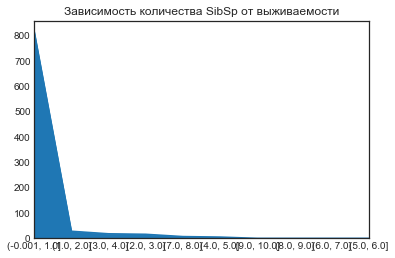

In [89]:
SS = pd.DataFrame()
SS['Survived'] = data.Survived
SS['SibSp'] = pd.cut(data.SibSp, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], include_lowest = True)
(SS.SibSp.value_counts()).plot.area().set_title("Зависимость количества SibSp от выживаемости")

#Гипотеза: люди, не имеющие родстенников (кроме детей/родителей) имеют больше шансов на выживание
#Вывод: гипотеза подтвердилась

Text(0.5, 1.0, 'Зависимость количества ParCh от выживаемости')

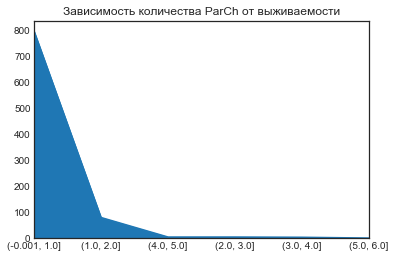

In [94]:
P = pd.DataFrame()
P['Survived'] = data.Survived
P['ParCh'] = pd.cut(data.Parch, [0, 1, 2, 3, 4, 5, 6], include_lowest = True)
(P.ParCh.value_counts()).plot.area().set_title("Зависимость количества ParCh от выживаемости")

#Гипотеза: чем меньше детей, тем больше шансов выжить (т.к. не нужно спасать детей, а только себя)
#Вывод: гипотеза подтверждена

Text(0.5, 1.0, 'Зависимость числа родственников от выживаемости')

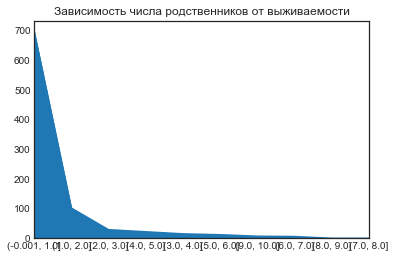

In [102]:
F = pd.DataFrame()
F['Survived'] = data.Survived
F['Family'] = pd.cut(data.SibSp+data.Parch, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], include_lowest = True)
(F.Family.value_counts()).plot.area().set_title("Зависимость числа родственников от выживаемости")

#Гипотеза: на основе предыдущих результвтов - чем меньше родственников, тем больше шансов выжить 
#Вывод: гипотеза верна (возможно, потому что нужно думать только о своём спасении, а не о спасении других. Хотя, почему никто 
#из родственников не помогает спастись, хм..)


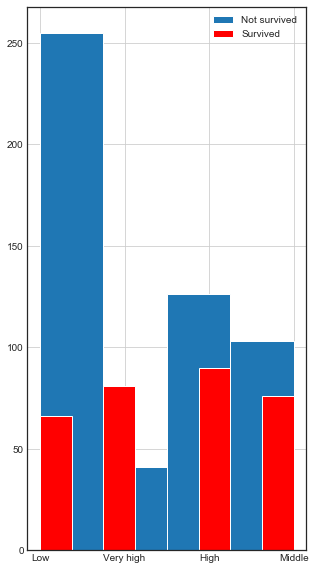

In [134]:
data['Fare_Class'] = pd.cut(data['Fare'], bins=[0,10,20,50,120], labels=['Low','Middle', 'High','Very high'])

ax = data[data['Survived'] == 0]['Fare_Class'].hist(figsize=(5, 10), bins=4, edgecolor='white', grid=True)
data[data['Survived'] == 1]['Fare_Class'].hist(figsize=(5, 10), bins=8, edgecolor='white', grid=True, color='red')
ax.legend(['Not survived', 'Survived'])

#Гипотеза: чем выше выше тариф, тем больше шансов выжить
#Вывод: зависимость, указанная в гипотезе полностью выполняется: процент выживших среди людей, ехавших более дорогим тарифом,
# в несколько раз больше

In [140]:
data.groupby(["Embarked"])["Survived"].value_counts(normalize=True)

#Гипотеза: предположим, у людей, выехавших из порта Q шансов выжить больше:)
#Вывод: гипотеза неверна, почему-то выживаемость наиболее высока среди пассажиров, выехавших из порта C

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.663043
          1           0.336957
Name: Survived, dtype: float64

In [143]:
#Итоговый вывод: согласно предложенным данным шансы выжить повышаются, если:
# 1. ехать в более высоком классе
# 2. быть женского пола
# 3. быть моложе
# 4. ехать в одиночку без каких-либо родственников
# 5. ехать по дорогому тарифу
# 6. выехать из порта C.
#То есть больше всего шансов выжить у одинокой молодой женщины, выехавшей из порта C и едущей в первом классе по самому 
# дорогому тарифу:) 